# Getting started with prenspire

In [1]:
import random
from pathlib import Path
from clophfit.prenspire import prenspire

%load_ext autoreload
%autoreload 2
tpath = Path("../../tests/EnSpire")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
ef1 = prenspire.EnspireFile(tpath / "h148g-spettroC.csv")
ef2 = prenspire.EnspireFile(tpath / "e2-T-without_sample_column.csv")
ef3 = prenspire.EnspireFile(tpath / "24well_clop0_95.csv")

In [4]:
ef3.wells, ef3._wells_platemap, ef3._platemap

(['A03', 'A04', 'A05', 'A06', 'B01', 'B02', 'C01', 'C02', 'C03'],
 ['A03', 'A04', 'A05', 'A06', 'B01', 'B02', 'C01', 'C02', 'C03'],
 [['A', '  ', '  ', '- ', '- ', '- ', '- '],
  ['B', '- ', '- ', '  ', '  ', '  ', '  '],
  ['C', '- ', '- ', '- ', '  ', '  ', '  '],
  ['D', '  ', '  ', '  ', '  ', '  ', '  ']])

In [5]:
ef1.__dict__.keys()

dict_keys(['file', 'verbose', 'metadata', 'measurements', 'wells', '_ini', '_fin', '_wells_platemap', '_platemap'])

In [6]:
ef1.measurements.keys(), ef2.measurements.keys()

(dict_keys(['A']), dict_keys(['B', 'A', 'C', 'D', 'E', 'F', 'G', 'H']))

when testing each spectra for the presence of a single wavelength in the appropriate monochromator

In [7]:
ef2.measurements["A"]["metadata"]

{'temp': '25',
 'Monochromator': 'Excitation',
 'Min wavelength': '400',
 'Max wavelength': '510',
 'Wavelength': '530',
 'Using of excitation filter': 'Top',
 'Measurement height': '8.9',
 'Number of flashes': '50',
 'Number of flashes integrated': '50',
 'Flash power': '100'}

In [8]:
ef2.measurements["A"].keys()

dict_keys(['metadata', 'lambda', 'F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07'])

In [9]:
random.seed(11)
random.sample(ef1.measurements["A"]["F01"], 7)

[2163.0, 607.0, 1846.0, 517.0, 572.0, 2145.0, 2028.0]

In [10]:
en1 = prenspire.ExpNote(tpath / "h148g-spettroC-nota")
en1

ExpNote(note_file=PosixPath('../../tests/EnSpire/h148g-spettroC-nota'), verbose=0, wells=['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10', 'A11', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'E01', 'E02', 'E03', 'E04', 'E05', 'E06', 'E07', 'E08', 'E09', 'E10', 'E11', 'F01', 'F02', 'F03', 'F04', 'F05', 'G01', 'G02', 'G03', 'G04', 'G05'], _note_list=[['Well', 'pH', 'Chloride'], ['A01', '5.2', '0'], ['A02', '5.2', '6.7'], ['A03', '5.2', '13.3'], ['A04', '5.2', '26.7'], ['A05', '5.2', '40'], ['A06', '5.2', '60'], ['A07', '5.2', '87'], ['A08', '5.2', '120'], ['A09', '5.2', '267'], ['A10', '5.2', '400'], ['A11', '5.2', '667'], ['B01', '6.3', '0'], ['B02', '6.3', '6.7'], ['B03', '6.3', '13.3'], ['B04', '6.3', '26.7'], ['B05', '6.3', '40'], ['B06', '6.3', '60'], ['B07', '6.3', '87'], ['B08'

In [4]:
ef = prenspire.EnspireFile(tpath / "G10.csv")

Text(0.26, 0.54, '7.6 ± 7753.51[480:580]')

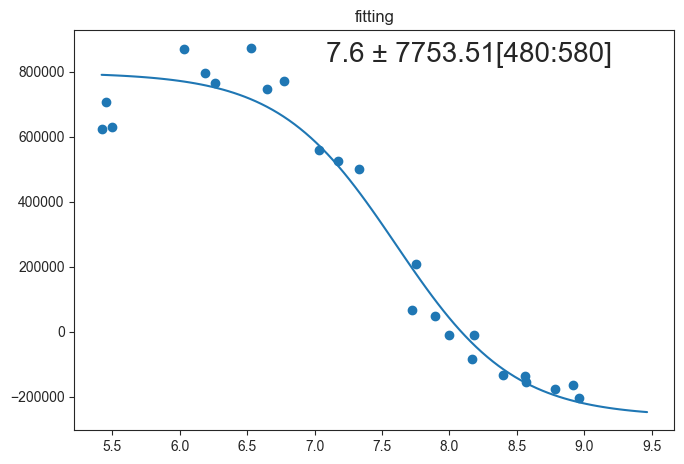

In [76]:
band = (480, 580)
try:
    ini = band[0]
    fin = band[1]
    y = []
    for c in conc:
        y.append(f[c].loc[ini:fin].sum())
    result = fit_titration_spectra(fz_pk, conc, y)
except:
    print(
        f"""bands [{ini}, {fin}] not in index.
            Try other values"""
    )
    raise
# plotting
fig1 = sb.mpl.pyplot.figure(figsize=(12, 8))
ax4 = fig1.add_axes([0.05, 0.08, 0.50, 0.50], title="fitting")
ax4.scatter(conc, y)
xmin = conc.min()
xmax = conc.max()
xmax += (xmax - xmin) / 7
xlin = np.linspace(xmin, xmax, 100)
ax4.plot(xlin, fz_pk(result.K, [result.SA, result.SB], xlin))
title = (
    str(round(result.K, 2))
    + " \u00B1 "
    + str(round(result.sK, 2))
    + "["
    + str(ini)
    + ":"
    + str(fin)
    + "]"
)
sb.mpl.pyplot.figtext(0.26, 0.54, title, size=20)

In [5]:
buf_A = tit["B"].iloc[:, -8:].mean(axis=1)
ref = tit["B"].iloc[:, 10]
f = tit["B"].iloc[:, :-8].subtract(buf_A, axis=0).subtract(ref, axis=0)

NameError: name 'tit' is not defined

In [5]:
fp = tpath / "h148g-spettroC-nota.csv"
n1 = prenspire.Note(fp, verbose=1)
n1.build_titrations(ef1)

Wells ['A02', 'A03']...['G04', 'G05'] generated.


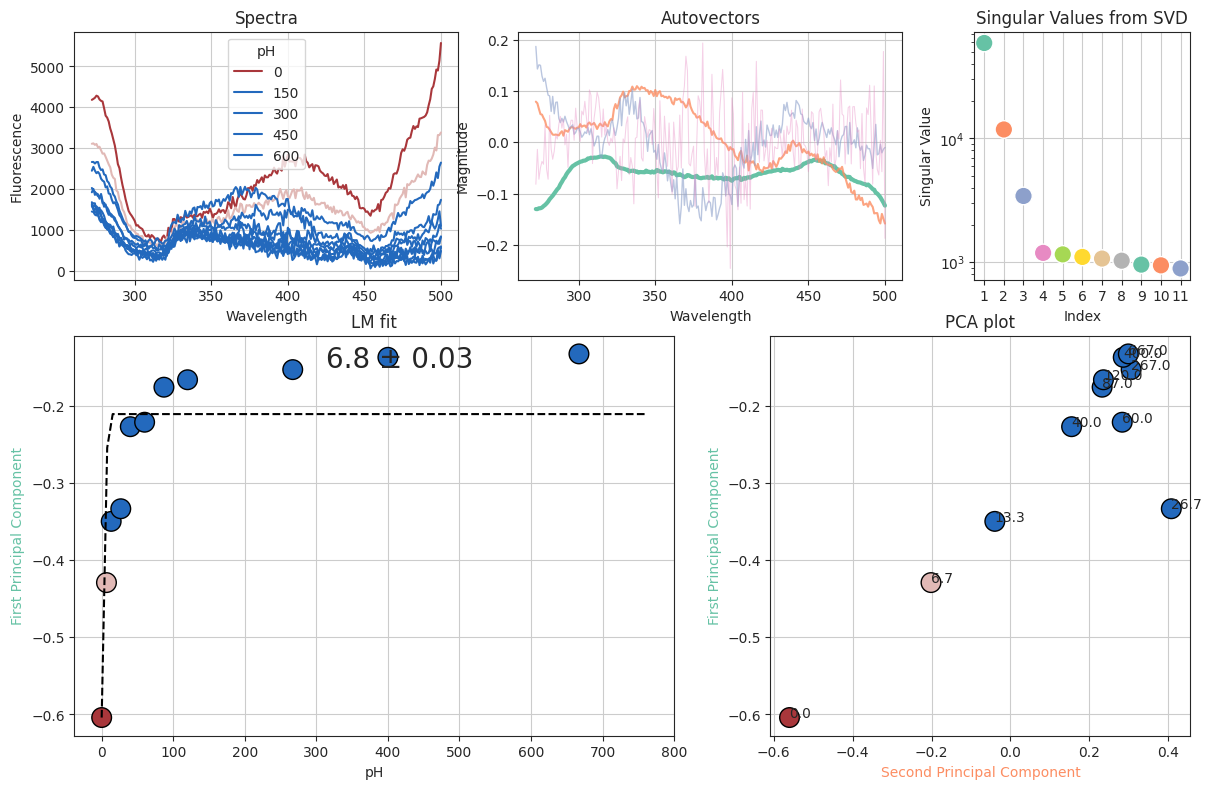

In [9]:
from clophfit.binding import fit_titration_spectra

COLOR_MAP = plt.cm.Set2


def fz_pk(pk: float, p: list[float], x):
    return (p[1] + p[0] * 10 ** (pk - x)) / (1 + 10 ** (pk - x))


def apply_common_plot_style(ax, title, xlabel, ylabel):
    ax.grid(True)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)


def plot_spectra(f, ax):
    dat = f.copy()
    dat["lambda"] = dat.index
    sb.lineplot(
        data=dat.melt(id_vars="lambda", var_name="pH"),
        x="lambda",
        y="value",
        hue="pH",
        hue_norm=(5.7, 8.7),
        palette=sb.cm.vlag_r,
        ax=ax,
    )
    apply_common_plot_style(ax, "Spectra", "Wavelength", "Fluorescence")


def plot_autovectors(f, u, ax):
    apply_common_plot_style(ax, "Autovectors", "Wavelength", "Magnitude")
    for i in range(4):
        ax.plot(
            f.index,
            u[:, i],
            color=COLOR_MAP(i),
            lw=3 / (i + 1),
            alpha=max(0.3, 1 - 0.2 * i),
        )


def plot_fit(conc, y, ax, result, fz_pk):
    # Create scatterplot
    ax.scatter(
        conc, y, c=conc, cmap=sb.cm.vlag_r, vmin=5.7, vmax=8.7, s=200, edgecolors="k"
    )
    apply_common_plot_style(ax, "LM fit", "pH", "First Principal Component")
    ax.get_yaxis().label.set_color(COLOR_MAP(0))
    # Adjust x-axis limits
    xmin, xmax = conc.min(), conc.max()
    xmax += (xmax - xmin) / 7
    xlin = np.linspace(xmin, xmax, 100)
    # Plot fit line
    ax.plot(xlin, fz_pk(result.K, [result.SA, result.SB], xlin), "k--")
    # Add fit result to plot
    title = str(round(result.K, 2)) + " \u00B1 " + str(round(result.sK, 2))
    sb.mpl.pyplot.figtext(0.26, 0.54, title, size=20)


def plot_pca(V, ax, conc):
    ax.scatter(
        V[1], V[0], c=conc, cmap=sb.cm.vlag_r, vmin=5.7, vmax=8.7, s=200, edgecolors="k"
    )
    apply_common_plot_style(ax, "PCA plot", "", "")
    ax.set_ylabel("First Principal Component", color=COLOR_MAP(0))
    ax.set_xlabel("Second Principal Component", color=COLOR_MAP(1))
    # Add labels.
    for x, y, w in zip(V[1], V[0], conc):
        ax.text(x, y, w)


def plot_autovalues(S, ax):
    df = pd.DataFrame({"index": range(1, len(S) + 1), "singular_values": S})
    sb.scatterplot(
        x="index",
        y="singular_values",
        data=df,
        ax=ax,
        hue="index",
        s=160,
        legend=False,
        palette="Set2",
    )
    apply_common_plot_style(ax, "Singular Values from SVD", "Index", "Singular Value")
    ax.set(yscale="log")
    ax.set_xticks(np.arange(1, len(S) + 1))


def f_svd(f):
    u, s, v = np.linalg.svd(f)
    conc = f.columns
    y = v[0, :]
    result = fit_titration_spectra(fz_pk, conc, y)
    sb.set_style("ticks")
    fig = sb.mpl.pyplot.figure(figsize=(12, 8))
    ax1 = fig.add_axes([0.05, 0.65, 0.32, 0.31])
    plot_spectra(f, ax1)
    ax2 = fig.add_axes([0.42, 0.65, 0.32, 0.31])
    plot_autovectors(f, u, ax2)
    ax3 = fig.add_axes([0.80, 0.65, 0.18, 0.31])
    plot_autovalues(s, ax3)
    ax4 = fig.add_axes([0.05, 0.08, 0.50, 0.50])
    plot_fit(conc, y, ax4, result, fz_pk)
    ax5 = fig.add_axes([0.63, 0.08, 0.35, 0.50])
    plot_pca(v, ax5, conc)
    return fig


# figure = f_svd(nn.titrations['NTT-G10'][20.0]['Cl_0.0']['D'])
figure = f_svd(n1.titrations["H148G"][20.0]["pH_6.3"]["A"])

In [6]:
fp = tpath / "NTT-G10_note.csv"
nn = prenspire.Note(fp, verbose=1)
nn.build_titrations(ef)

Wells ['D02', 'D03']...['G07', 'G08'] generated.


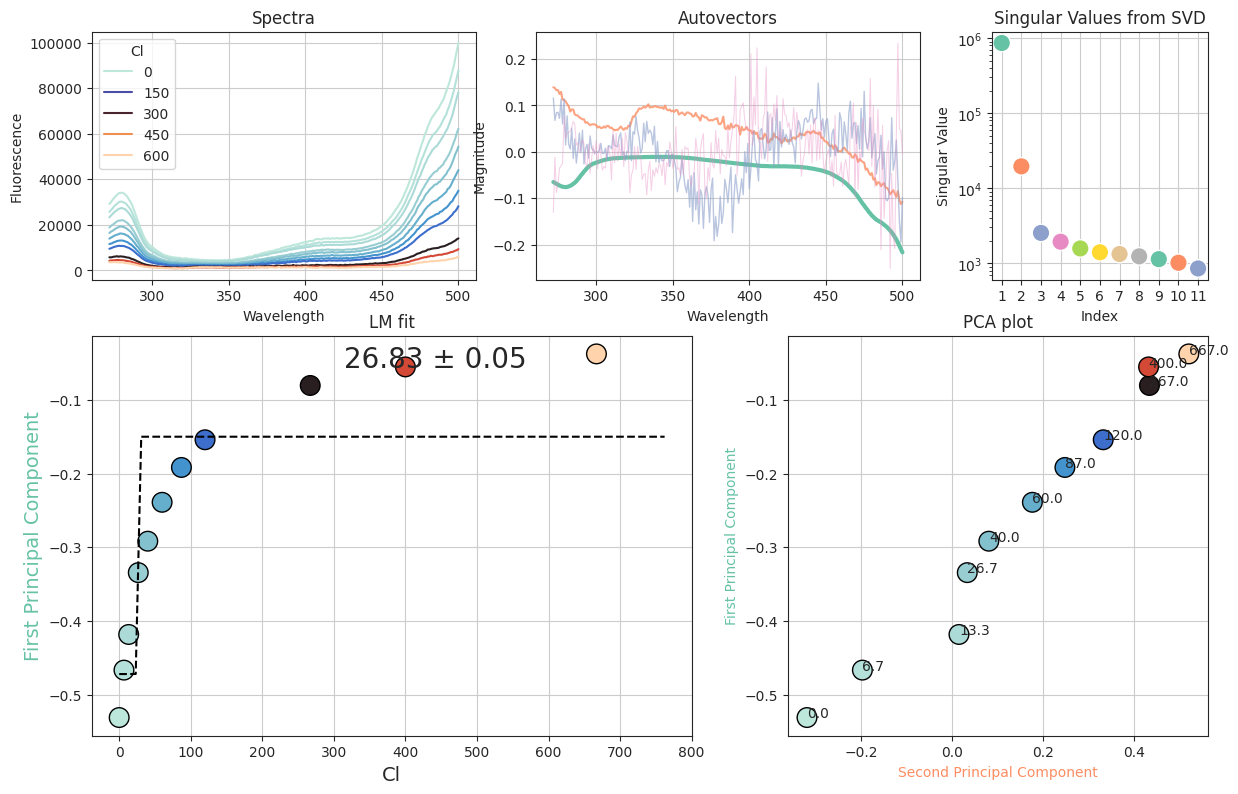

In [59]:
from clophfit.binding import fit_titration_spectra

COLOR_MAP = plt.cm.Set2


def fz_pk(pk: float, p: list[float], x):
    return (p[1] + p[0] * 10 ** (pk - x)) / (1 + 10 ** (pk - x))


def fz_kd(k: float, p: list[float], x):
    return (float(p[1]) + float(p[0]) * 10 ** (k - x)) / (1 + 10 ** (k - x))


def apply_common_plot_style(ax, title, xlabel, ylabel):
    ax.grid(True)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)


def plot_spectra(f, ax, hue_norm, palette, kind):
    dat = f.copy()
    dat["lambda"] = dat.index
    sb.lineplot(
        data=dat.melt(id_vars="lambda", var_name=kind),
        x="lambda",
        y="value",
        hue=kind,
        hue_norm=hue_norm,
        palette=palette,
        ax=ax,
    )
    apply_common_plot_style(ax, "Spectra", "Wavelength", "Fluorescence")


def plot_autovectors(f, u, ax):
    apply_common_plot_style(ax, "Autovectors", "Wavelength", "Magnitude")
    for i in range(4):
        ax.plot(
            f.index,
            u[:, i],
            color=COLOR_MAP(i),
            lw=3 / (i + 1),
            alpha=max(0.3, 1 - 0.2 * i),
        )


def plot_fit(conc, y, ax, result, fz, hue_norm, palette, kind):
    # Create scatterplot
    ax.scatter(
        conc,
        y,
        c=conc,
        cmap=palette,
        vmin=hue_norm[0],
        vmax=hue_norm[1],
        s=200,
        edgecolors="k",
    )
    apply_common_plot_style(ax, "LM fit", "", "")
    ax.set_ylabel("First Principal Component", color=COLOR_MAP(0), fontsize=14)
    ax.set_xlabel(kind, fontsize=14)
    # Adjust x-axis limits
    xmin = conc.min()
    xmax = conc.max()
    xmax += (xmax - xmin) / 7
    xlin = np.linspace(xmin, xmax, 100)
    # Plot fit line
    ax.plot(xlin, fz(result.K, [result.SA, result.SB], xlin), "k--")
    # Add fit result to plot
    title = str(round(result.K, 2)) + " \u00B1 " + str(round(result.sK, 2))
    sb.mpl.pyplot.figtext(0.26, 0.54, title, size=20)


def plot_pca(V, ax, conc, hue_norm, palette):
    ax.scatter(
        V[1],
        V[0],
        c=conc,
        cmap=palette,
        vmin=hue_norm[0],
        vmax=hue_norm[1],
        s=200,
        edgecolors="k",
    )
    apply_common_plot_style(ax, "PCA plot", "", "")
    ax.set_ylabel("First Principal Component", color=COLOR_MAP(0))
    ax.set_xlabel("Second Principal Component", color=COLOR_MAP(1))
    # Add labels.
    for x, y, w in zip(V[1], V[0], conc):
        ax.text(x, y, w)


def plot_autovalues(S, ax):
    df = pd.DataFrame({"index": range(1, len(S) + 1), "singular_values": S})
    sb.scatterplot(
        x="index",
        y="singular_values",
        data=df,
        ax=ax,
        hue="index",
        s=160,
        legend=False,
        palette="Set2",
    )
    apply_common_plot_style(ax, "Singular Values from SVD", "Index", "Singular Value")
    ax.set(yscale="log")
    ax.set_xticks(np.arange(1, len(S) + 1))


def f_svd(f, kind):
    if kind == "Cl":
        hue_norm = (0, 500)
        palette = sb.cm.icefire
        fz = fz_kd
    else:
        hue_norm = (5.7, 8.7)
        palette = sb.cm.vlag_r
        fz = fz_pk
    u, s, v = np.linalg.svd(f)
    conc = f.columns
    y = v[0, :]
    result = fit_titration_spectra(fz, conc, y, (30, -0.4, -0.1))
    sb.set_style("ticks")
    fig = sb.mpl.pyplot.figure(figsize=(12, 8))
    ax1 = fig.add_axes([0.05, 0.65, 0.32, 0.31])
    plot_spectra(f, ax1, hue_norm, palette, kind)

    ax2 = fig.add_axes([0.42, 0.65, 0.32, 0.31])
    plot_autovectors(f, u, ax2)
    ax3 = fig.add_axes([0.80, 0.65, 0.18, 0.31])
    plot_autovalues(s, ax3)

    ax4 = fig.add_axes([0.05, 0.08, 0.50, 0.50])
    plot_fit(conc, y, ax4, result, fz, hue_norm, palette, kind)
    ax5 = fig.add_axes([0.63, 0.08, 0.35, 0.50])
    plot_pca(v, ax5, conc, hue_norm, palette)
    return fig


# figure = f_svd(nn.titrations['NTT-G10'][20.0]['Cl_0.0']['D'])

figure = f_svd(n1.titrations["H148G"][20.0]["pH_8.1"]["A"], "Cl")

AttributeError: 'list' object has no attribute 'min'

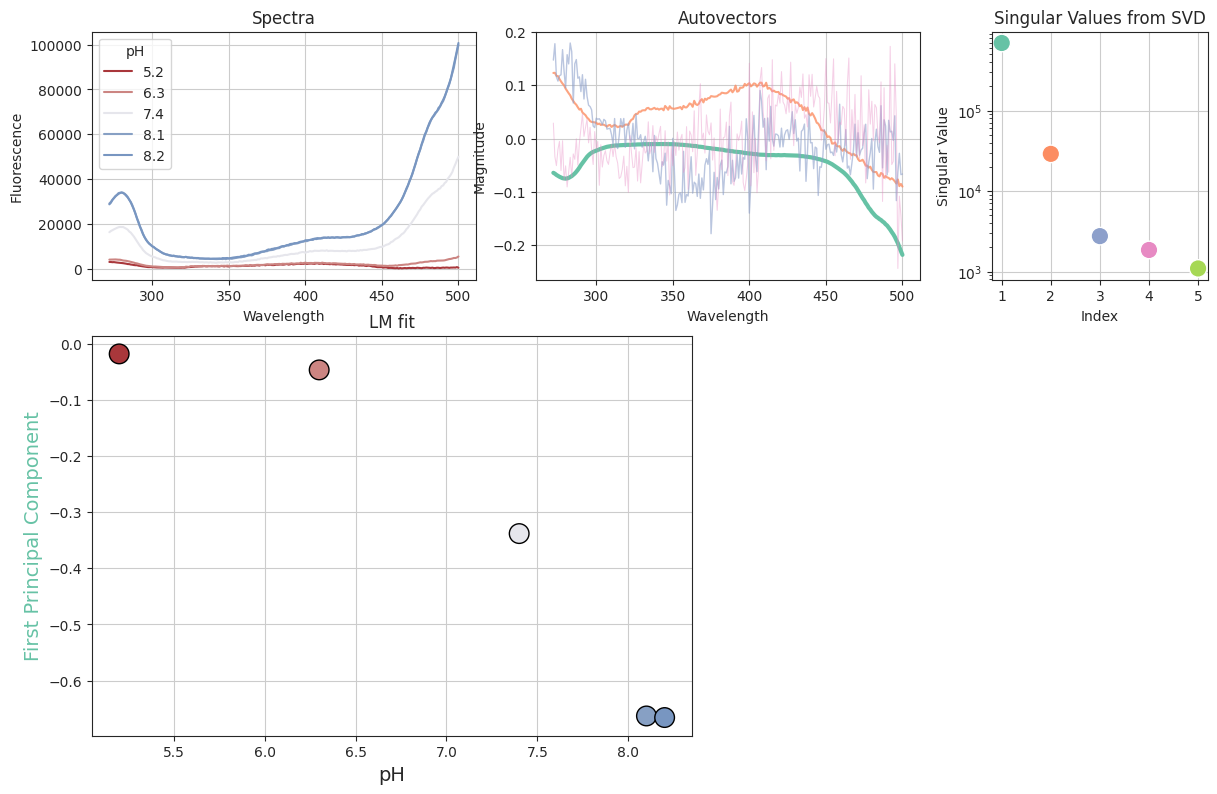

In [62]:
from clophfit.binding.fitting import f_svd

figure = f_svd(n1.titrations["H148G"][20.0]["Cl_0.0"]["A"], "pH")

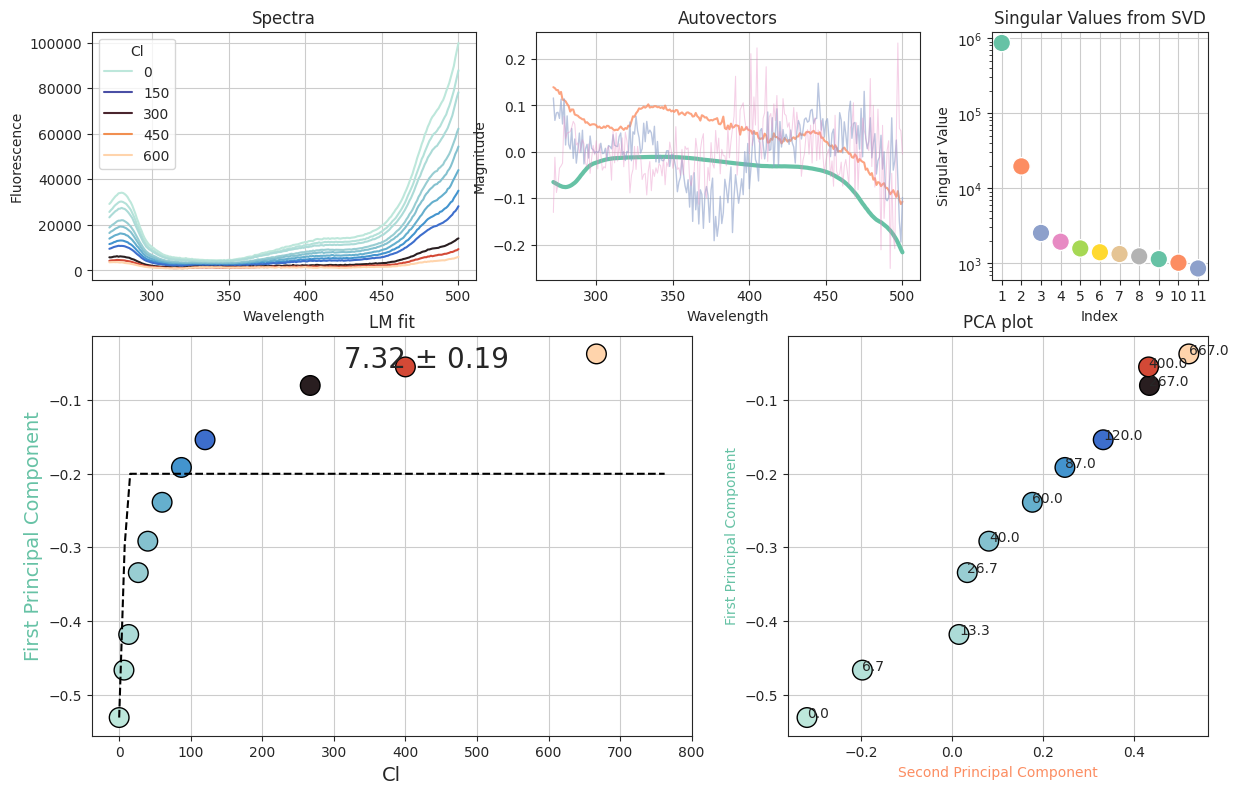

In [60]:
def calculate_svd_and_fit(f, fz):
    u, s, v = np.linalg.svd(f)
    conc = f.columns
    y = v[0, :]
    result = fit_titration_spectra(fz, conc, y)
    return u, s, v, conc, y, result


def visualize_svd_and_fit(f, u, s, v, conc, y, result, fz, hue_norm, palette, kind):
    sb.set_style("ticks")
    fig = sb.mpl.pyplot.figure(figsize=(12, 8))
    ax1 = fig.add_axes([0.05, 0.65, 0.32, 0.31])
    plot_spectra(f, ax1, hue_norm, palette, kind)
    ax2 = fig.add_axes([0.42, 0.65, 0.32, 0.31])
    plot_autovectors(f, u, ax2)
    ax3 = fig.add_axes([0.80, 0.65, 0.18, 0.31])
    plot_autovalues(s, ax3)
    ax4 = fig.add_axes([0.05, 0.08, 0.50, 0.50])
    plot_fit(conc, y, ax4, result, fz, hue_norm, palette, kind)
    ax5 = fig.add_axes([0.63, 0.08, 0.35, 0.50])
    plot_pca(v, ax5, conc, hue_norm, palette)
    return fig


def f_svd(f, kind):
    if kind == "Cl":
        hue_norm = (0, 500)
        palette = sb.cm.icefire
        fz = fz_kd
    else:
        hue_norm = (5.7, 8.7)
        palette = sb.cm.vlag_r
        fz = fz_pk
    u, s, v, conc, y, result = calculate_svd_and_fit(f, fz)
    fig = visualize_svd_and_fit(
        f, u, s, v, conc, y, result, fz, hue_norm, palette, kind
    )
    return fig


# figure = f_svd(nn.titrations['NTT-G10'][20.0]['Cl_0.0']['D'])

figure = f_svd(n1.titrations["H148G"][20.0]["pH_8.1"]["A"], "Cl")

In [168]:
nn.titrations["NTT-G10"][37.0]["Cl_0.0"]["B"]

,8.92,8.56,8.18,7.89,7.33,6.77,6.26,5.50,8.78,8.40,...,6.03,5.42,8.96,8.57,8.17,7.75,7.17,6.65,6.19,5.45
440.0,204.0,78.0,121.0,75.0,135.0,95.0,69.0,132.0,162.0,84.0,...,135.0,117.0,70.0,48.0,30.0,65.0,79.0,76.0,130.0,89.0
441.0,199.0,103.0,72.0,35.0,104.0,114.0,111.0,125.0,60.0,99.0,...,151.0,81.0,117.0,83.0,92.0,106.0,125.0,64.0,120.0,156.0
442.0,146.0,112.0,87.0,71.0,45.0,49.0,102.0,81.0,43.0,92.0,...,158.0,103.0,82.0,63.0,51.0,81.0,102.0,137.0,136.0,99.0
443.0,199.0,92.0,106.0,38.0,127.0,118.0,73.0,132.0,55.0,127.0,...,119.0,68.0,53.0,61.0,54.0,112.0,45.0,77.0,77.0,54.0
444.0,197.0,67.0,117.0,21.0,88.0,151.0,122.0,165.0,91.0,151.0,...,181.0,123.0,64.0,96.0,68.0,85.0,99.0,102.0,71.0,147.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646.0,0.0,0.0,0.0,23.0,34.0,72.0,82.0,35.0,0.0,0.0,...,27.0,15.0,15.0,60.0,1.0,37.0,2.0,45.0,97.0,50.0
647.0,0.0,8.0,0.0,0.0,7.0,9.0,33.0,7.0,0.0,0.0,...,0.0,42.0,39.0,0.0,0.0,1.0,0.0,45.0,64.0,0.0
648.0,33.0,0.0,0.0,0.0,15.0,0.0,82.0,49.0,0.0,23.0,...,42.0,44.0,0.0,0.0,0.0,0.0,0.0,18.0,52.0,13.0
649.0,0.0,0.0,0.0,0.0,0.0,29.0,21.0,20.0,40.0,0.0,...,71.0,68.0,0.0,0.0,19.0,73.0,38.0,63.0,47.0,58.0


In [126]:
# dd['H148G'][20.0]
dd["NTT-G10"][37.0]

,Well,pH,Cl,Name,Temp,Labels
32,D01,8.92,0.0,NTT-G10,37.0,B E F
33,D02,8.56,0.0,NTT-G10,37.0,B E F
34,D03,8.18,0.0,NTT-G10,37.0,B E F
35,D04,7.89,0.0,NTT-G10,37.0,B E F
36,D05,7.33,0.0,NTT-G10,37.0,B E F
37,D06,6.77,0.0,NTT-G10,37.0,B E F
38,D07,6.26,0.0,NTT-G10,37.0,B E F
39,D08,5.50,0.0,NTT-G10,37.0,B E F
40,E01,8.78,0.0,NTT-G10,37.0,B E F
41,E02,8.40,0.0,NTT-G10,37.0,B E F


In [143]:
# dd["NTT-G10"][20.0]["Cl_0.0"]
dd["H148G"][20.0]["pH_5.2"]

,Well,pH,Cl,Name,Temp,Labels
0,A01,5.2,0.0,H148G,20.0,A
1,A02,5.2,6.7,H148G,20.0,A
2,A03,5.2,13.3,H148G,20.0,A
3,A04,5.2,26.7,H148G,20.0,A
4,A05,5.2,40.0,H148G,20.0,A
5,A06,5.2,60.0,H148G,20.0,A
6,A07,5.2,87.0,H148G,20.0,A
7,A08,5.2,120.0,H148G,20.0,A
8,A09,5.2,267.0,H148G,20.0,A
9,A10,5.2,400.0,H148G,20.0,A


In [30]:
en1._note_list

conc_well = [(line[1], line[0]) for line in en1._note_list if line[2] == "0"]
conc = [float(tpl[0]) for tpl in conc_well]
well = [tpl[1] for tpl in conc_well]
conc_well, conc, well

([('5.2', 'A01'),
  ('6.3', 'B01'),
  ('7.4', 'C01'),
  ('8.1', 'D01'),
  ('8.2', 'E01')],
 [5.2, 6.3, 7.4, 8.1, 8.2],
 ['A01', 'B01', 'C01', 'D01', 'E01'])

In [ ]:
@dataclass
class Metadata:
    
@dataclass
class Datum:
    well: str
    pH: float
    Cl: float
    T: float
    mut: str
    labels: list[str]
    metadata: dict[str, Metadata]


In [23]:
en1.wells[:7,]

TypeError: list indices must be integers or slices, not tuple

In [11]:
en1._note_list[:5]

[['Well', 'pH', 'Chloride'],
 ['A01', '5.2', '0'],
 ['A02', '5.2', '6.7'],
 ['A03', '5.2', '13.3'],
 ['A04', '5.2', '26.7']]

In [12]:
en1.wells == ef1.wells, en1.wells == ef2.wells

(True, False)

In [13]:
en1.build_titrations(ef1)

In [14]:
en1.__dict__.keys()

dict_keys(['note_file', 'verbose', 'wells', '_note_list', 'titrations', 'pH_values'])

In [15]:
en1.pH_values

['5.2', '6.3', '7.4', '8.1', '8.2']

In [16]:
tit0 = en1.titrations[0]
tit3 = en1.titrations[3]

In [17]:
tit0.__dict__.keys()

dict_keys(['conc', 'data', 'cl'])

In [18]:
tit0.conc, tit0.cl, tit3.conc, tit3.ph

([5.2, 6.3, 7.4, 8.1, 8.2],
 '0',
 [0.0, 6.7, 13.3, 26.7, 40.0, 60.0, 87.0, 120.0, 267.0, 400.0, 667.0],
 '7.4')

In [19]:
tit0.data["A"]

,5.2,6.3,7.4,8.1,8.2
,A01,B01,C01,D01,E01
lambda,,,,,
272.0,3151.0,4181.0,16413.0,29192.0,28816.0
273.0,3130.0,4204.0,16926.0,29909.0,29545.0
274.0,3043.0,4232.0,17331.0,30900.0,30750.0
275.0,3079.0,4283.0,17680.0,31717.0,31547.0
276.0,2975.0,4264.0,18020.0,32564.0,32336.0
...,...,...,...,...,...
496.0,636.0,4689.0,43230.0,87203.0,87842.0
497.0,683.0,4923.0,45173.0,89719.0,90666.0


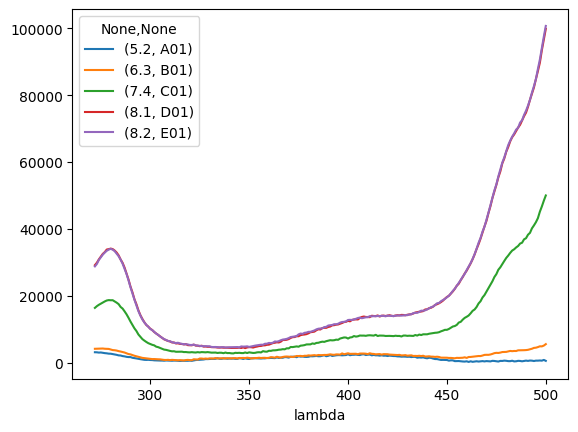

In [20]:
tit0.plot()

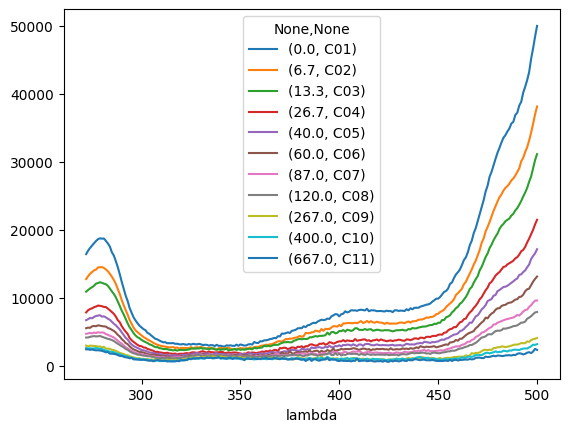

In [21]:
tit3.plot()